In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [2]:
# Downloading the iris dataset
iris = datasets.load_iris()
class_names = iris.target_names
# Convert to pandas format for easier processing
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [3]:
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Splitting dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
 iris_df[['sepal length (cm)', 'sepal width (cm)',
 'petal length (cm)','petal width (cm)']],
 iris_df['target'],
 test_size=0.2,
 random_state=2021)

In [5]:
# Import Naive Bayes
# In this case, I assume features follow a normal distribution
NB = GaussianNB()
# Train Naive Bayes Model
NB.fit(X_train, y_train)
print("Training accuracy: {:.2f}".format(NB.score(X_train, y_train)))
# Evaluate Model on test set
y_predict = NB.predict(X_test)
print("Testing accuracy NB: {:.2f}".format(NB.score(X_test, y_test)))

Training accuracy: 0.97
Testing accuracy NB: 0.93


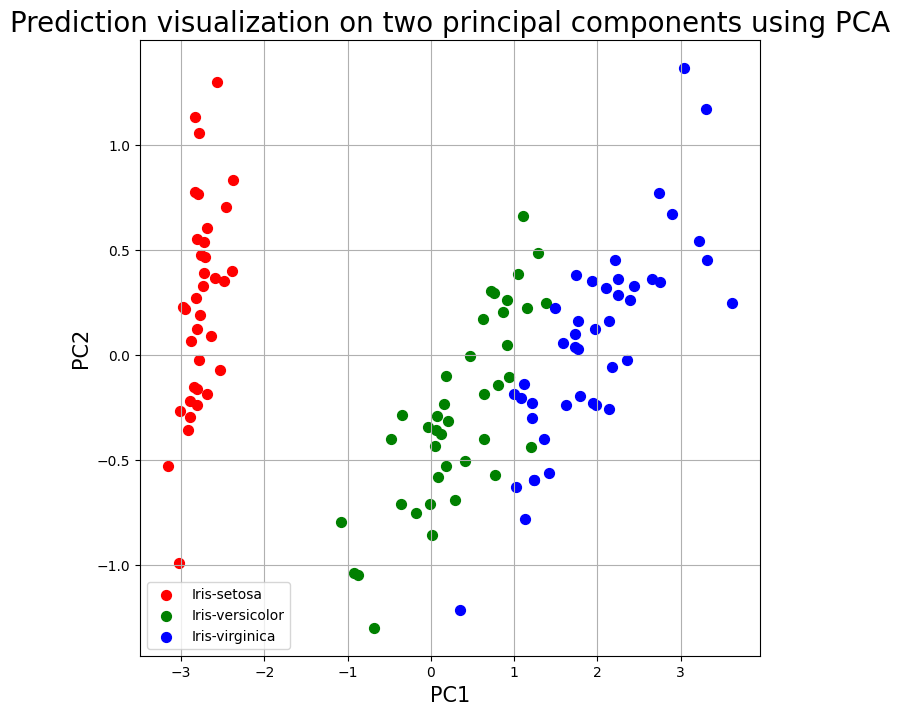

In [6]:
# Visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, y_train.reset_index(drop=True)], axis=1)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('Prediction visualization on two principal components using PCA', fontsize=20)
targets = [0, 1, 2]
targets_2_desc = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c=color, s=50, label=targets_2_desc[target])
ax.legend()
ax.grid()
